In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import math
import pandas as pd


In [9]:
special_chars_remover = re.compile("[^\w'|_]")
def remove_special_characters(sentence):
    return special_chars_remover.sub(' ', sentence)

In [10]:
def read_data():
    training_sentences = [[], []]
    bad_df=pd.read_csv('./data/prostitution.csv',sep=',')
    good_df=pd.read_csv('./data/not_spam.csv',sep=',')
    for doc in bad_df['text']:
        training_sentences[0].append(doc)
    for doc in good_df['text']:
        training_sentences[1].append(doc)
        
    return [' '.join(training_sentences[0]), ' '.join(training_sentences[1])]

In [11]:
def normalize_log_prob(prob1, prob2):
    maxprob = max(prob1, prob2)

    prob1 -= maxprob
    prob2 -= maxprob
    prob1 = math.exp(prob1)
    prob2 = math.exp(prob2)

    normalize_constant = 1.0 / float(prob1 + prob2)
    prob1 *= normalize_constant
    prob2 *= normalize_constant

    return (prob1, prob2)

def calculate_doc_prob(training_sentence, testing_sentence, alpha):
    logprob = 0

    training_model = create_BOW(training_sentence)
    testing_model = create_BOW(testing_sentence)
    total=sum(training_model.values())    
    for w,cnt in testing_model.items():
        if w not in training_model:
            logprob+=math.log(alpha)-math.log(total)
        else:
            logprob+=cnt*(math.log(training_model[w])-math.log(total))
    
    return logprob

In [13]:
def create_BOW(sentence):
    bow = {}
    sentence=sentence.lower()
    sentence=remove_special_characters(sentence)
    for i in sentence.split(' '):
        if(len(i)<1):
            continue
        bow.setdefault(i,0)
        bow[i]+=1

    return bow

In [20]:
def visualize_boxplot(title, values, labels):
    width = .35
    fig, ax = plt.subplots()
    ind = np.arange(len(values))
    rects = ax.bar(ind, values, width)
    ax.bar(ind, values, width=width)
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(labels)

    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., height + 0.01, '%.2lf%%' % (height * 100), ha='center', va='bottom')
    plt.show()
    autolabel(rects)

In [16]:
def naive_bayes(training_sentences, testing_sentence):
    log_prob_negative = calculate_doc_prob(training_sentences[0], testing_sentence, 0.1) + math.log(0.5)
    log_prob_positive = calculate_doc_prob(training_sentences[1], testing_sentence, 0.1) + math.log(0.5)
    prob_pair = normalize_log_prob(log_prob_negative, log_prob_positive)
    
    return prob_pair

In [14]:
def main():
    training_sentences = read_data()
    
    testing_sentence = input()
    prob_pair = naive_bayes(training_sentences, testing_sentence)
    
    plot_title = testing_sentence
    if len(plot_title) > 50: plot_title = plot_title[:50] + "..."
    visualize_boxplot(plot_title,
                  list(prob_pair),
                  ['Negative', 'Positive'])

출장 마사지 바로


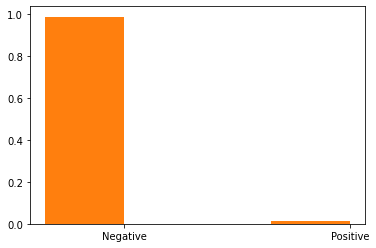

In [21]:
main()